In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde, pearsonr, ttest_ind, ttest_1samp, spearmanr
from sklearn.linear_model import LinearRegression
from statsmodels.stats.power import TTestIndPower

In [2]:
titanic_data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Inferential Statistics

A model is an equation that explains some features in the dataset. We add a residual to that model, some parameter that will explain the part of the result which isnt described in the features themselves. The residual is the gap between the label and what we predicted. We can think of residual as the error.

# Hypotheses Testing

## What Is a Hypotheses

What is a hypothesis? it's a claim that we need to prove or disprove. We do that using experimental or observational data, and we use it to make predictions about the future.

Hypotheses help transform vague ideas to concrete claims.

A good hypotheses should be a falsifiable claim, something we can theoretically prove wrong. It's a statement we check. It should be a prediction on some effect.

### Different Hypotheses Qualities:

Not a hypothesis: machine learning can help in a lot of different scenarios.

Bad Hypothesis: this model x knows how to solve the problem.

Much better hypothesis: tree based algorithms are better than neural net based algorithms for these types of problems by at least 10% accuracy.

### Exercise 

Take the tip dataset from sns and test the following hypotheses:

1. The average tip amount differs between smokers and non-smokers by more than x%
2. The median total bill differs by day of the week by more than x%.
3. Average tip percentage differs between lunch and dinner by more than x%.

In [3]:
tips = sns.load_dataset('tips')

In [4]:
smoker_tips = tips[tips['smoker'] == 'Yes']['tip']
non_smoker_tips = tips[tips['smoker'] == 'No']['tip']

C:\Users\jorda\AppData\Local\Temp\ipykernel_22844\791897564.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_tips_by_smoker = tips.groupby('smoker')['tip'].sum().reset_index()
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


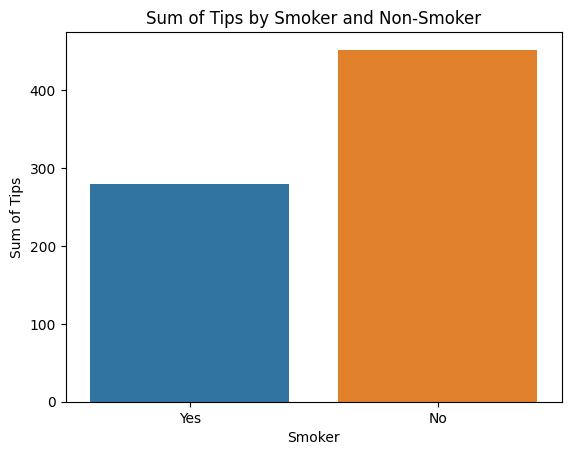

In [5]:
tips = sns.load_dataset("tips")

sum_tips_by_smoker = tips.groupby('smoker')['tip'].sum().reset_index()

sns.barplot(data=sum_tips_by_smoker, x='smoker', y='tip')

plt.xlabel('Smoker')
plt.ylabel('Sum of Tips')
plt.title('Sum of Tips by Smoker and Non-Smoker')

plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_22844\3936267617.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tips_by_smoker = tips.groupby('smoker')['tip'].mean().reset_index()
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


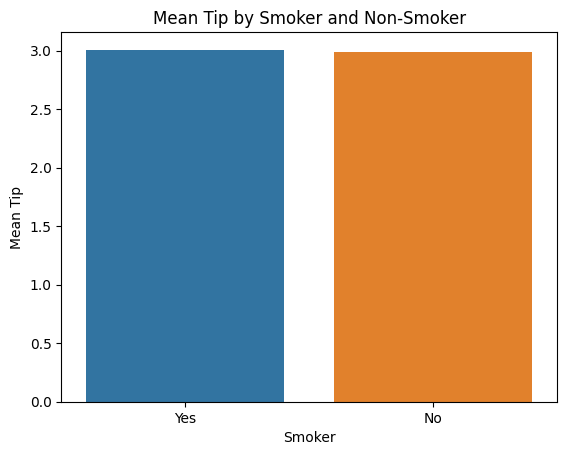

In [6]:
tips = sns.load_dataset("tips")

mean_tips_by_smoker = tips.groupby('smoker')['tip'].mean().reset_index()

sns.barplot(data=mean_tips_by_smoker, x='smoker', y='tip')

plt.xlabel('Smoker')
plt.ylabel('Mean Tip')
plt.title('Mean Tip by Smoker and Non-Smoker')

plt.show()

In [7]:
mean_tips_by_smoker

,smoker,tip
0,Yes,3.008710
1,No,2.991854


The mean is very different than the sum. What does this tell us? What can we infer from that?

In [8]:
len(smoker_tips), len(non_smoker_tips)

(93, 151)

In [9]:
non_smoker_tips.mean()

2.9918543046357615

In [10]:
smoker_tips.mean()

3.008709677419355

The mean is very different than the sum. What does this tell us? What can we infer from that?

## Null Hypotheses

A hypotheses that states there is no effect. The medicine isn't working, tree based models aren't better than neural net based models.

In statistical analysis, we try to disprove the null hypothesis. We try to show it's not true.

We define the alternative hypothesis:
tree based IS better, but we test the null hypothesis. Often referred as 

$$
H_0
$$

Pronounced as H not (naught, which means 0)

In statistical analysis we dont prove our claim, we dont even test it. We test the claim that nothing is working and if the data doesnt support that claim, we reject the claim that nothing works, e.g. something does work,

Let's continue with our example of tree based (tb) vs neural nets (dl). We want to suggest that tb works better on tabular data than dl, for all the datasets in the world. We can't examine every dataset in the world so we take a sample, we take 10 datasets. We plot the distribution of each model, the results on 10 datasets and dl results on 10 datasets and we try to understand if the distributions are different enough so we can disprove hypothesis 0

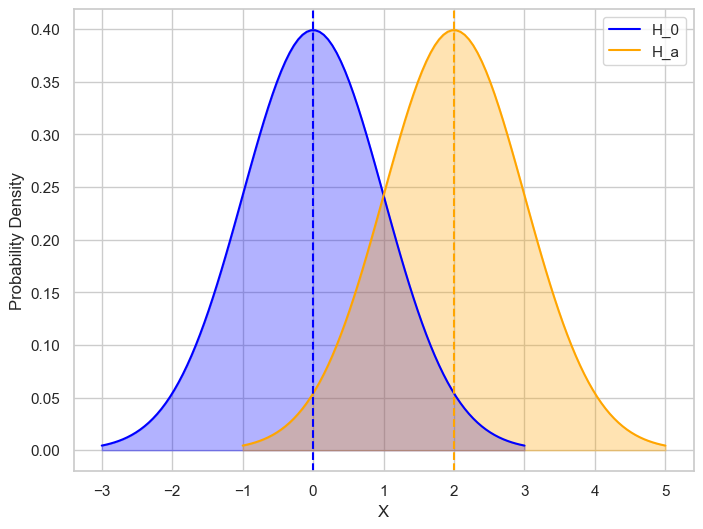

In [11]:
sns.set(style="whitegrid")

mu1, sigma1 = 0, 1
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
y1 = 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp(-(x1 - mu1)**2 / (2 * sigma1**2))

mu2, sigma2 = 2, 1  
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
y2 = 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu2)**2 / (2 * sigma2**2))

plt.figure(figsize=(8, 6))
plt.plot(x1, y1, color='blue', label='H_0')
plt.plot(x2, y2, color='orange', label='H_a')
plt.fill_between(x1, y1, color='blue', alpha=0.3)
plt.fill_between(x2, y2, color='orange', alpha=0.3)
plt.axvline(x=mu1, color='blue', linestyle='--')
plt.axvline(x=mu2, color='orange', linestyle='--')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


Can we make our lives super simple and just take the difference between the means?

We cant. 

Why? Two reasons:

1. The difference depends on the scale of the measurement. We might check the time it takes an algorithm to run, or the accuracy it provides, or the monetary cost (money), each measurement will return a completely different result for the same idea
2. The amount of overlap changes according to the shape of the distribution. If the distribution is more or less narrow, the overlap will change although the mean stays the same.

We need to take both considerations into account. The scale of the mean and the shape (width) of the distributions.

The calculation we will end up doing is some kind of signal divided by some kind of noise.

$$
\frac{Signal}{Noise}
$$

## P Value

In a real experiment we dont have the H_a distribution. We dont have the formula, if we would have, we wouldnt need the experiment. What we do have is a mean.

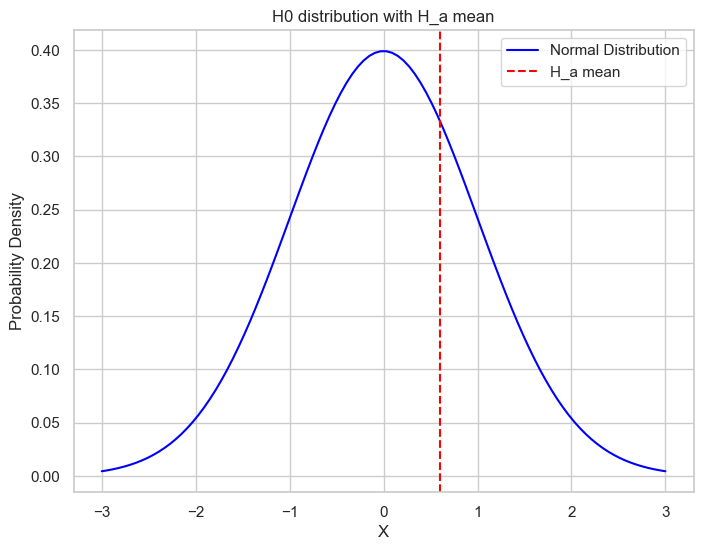

In [12]:
sns.set(style="whitegrid")

mu, sigma = 0, 1  
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

percentile_60 = np.percentile(x, 60)

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.axvline(x=percentile_60, color='red', linestyle='--', label='H_a mean')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('H0 distribution with H_a mean')
plt.legend()
plt.show()


P value - how likely is it that we received the result we did, given that h_0 is true. If we get something very different than h_0, and the p_value is very low, it means its unlikely this happened by accident, e.g. h_0 is probably false.

We cant really prove H_a is true, we can only say its unlikely that it happened by mistake. P value reflects this. The lower the p value, the lower the chance that we found the new truth by mistake (e.g. the results are true). 

If I want to generalize that every man with a blue shirt likes basketball and I only check one person, the P value will probably be big and state that I might be correct, but its very likely to reach that conclusion by mistake.

We decide the result is statistically significant if it passes some threshold, common ones are 0.05 and 0.01. So if the chance of finding what I did by mistake is < 0.05, I decide its true.

### Exercise

Use scipy.stats ttest_ind to test the difference between some two groups in the tips dataset. Is the p-value significant? if not, transform the dataset so it <b> is </b> significant.

In [13]:
# imports should be on the top of the file. I only put it here so you'll see where is it coming from.
from scipy.stats import ttest_ind

#### Solution

In [14]:
male_tips = tips[tips['sex'] == 'Male']['tip']
female_tips = tips[tips['sex'] == 'Female']['tip']

p_value = ttest_ind(male_tips, female_tips, nan_policy='omit', random_state=2).pvalue
assert p_value > 0.05

Since the p-value is above 0.05 (0.17), the difference between Men's tips and Women's is not statistically significant.

In [15]:
male_tips_transformed = male_tips[male_tips < 3]
female_tips_transformed = female_tips[female_tips > 3]

In [16]:
# Run the t-test again
p_value_transformed = ttest_ind(male_tips_transformed, female_tips_transformed, nan_policy='omit', random_state=2).pvalue
p_value_transformed

7.771653076852334e-33

In [17]:
assert p_value_transformed < 0.05

## Z-score

Z score, a.k.a standard score is the number of standard deviations from the mean. A z score of 2 is 2 standard deviations above the mean. Z = -2 is 2 standard deviations <b> below </b> the mean.

It allows us to compare 2 different variables from different data sets based on the distance from their own respective mean.

$$
Z = \frac{X - \mu}{\sigma}
$$

Note - Z score calculation assumes the data distributes normally, if it doesn't, it doesn't make sense to use the Z formula.

Normal standardized distribution is a distribution that its mean is 0 and std is 1

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


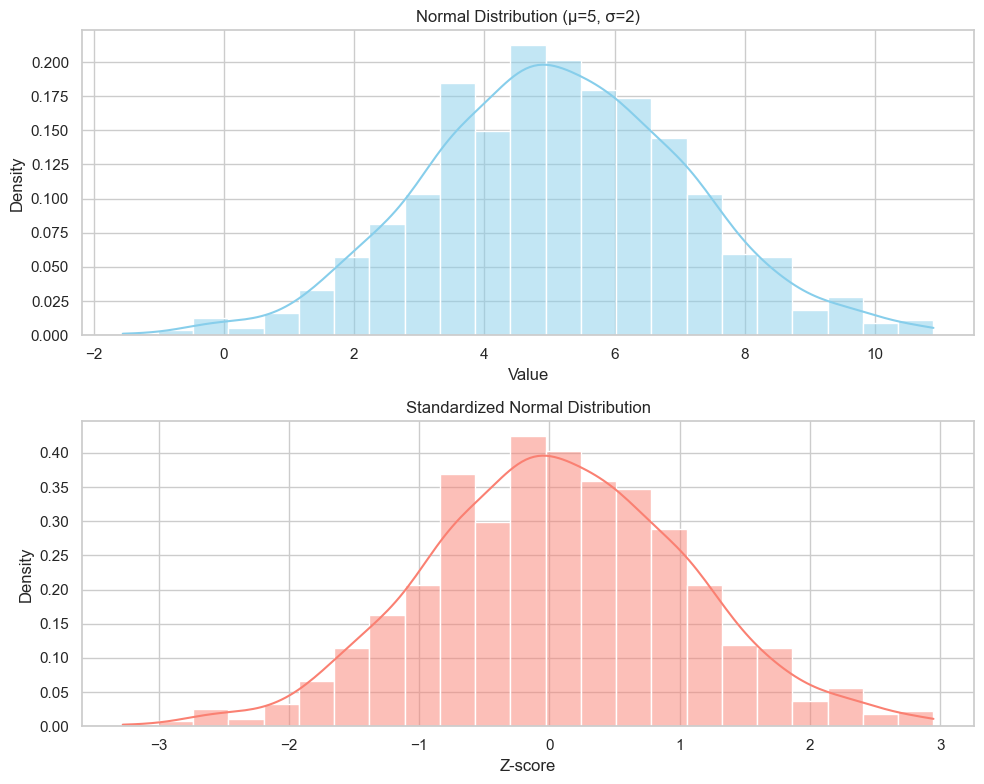

In [18]:
mu = 5 
sigma = 2

normal_data = np.random.normal(mu, sigma, 1000)
standardized_data = (normal_data - mu) / sigma

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.histplot(normal_data, kde=True, color='skyblue', stat='density')
plt.title('Normal Distribution (μ=5, σ=2)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 1, 2)
sns.histplot(standardized_data, kde=True, color='salmon', stat='density')
plt.title('Standardized Normal Distribution')
plt.xlabel('Z-score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


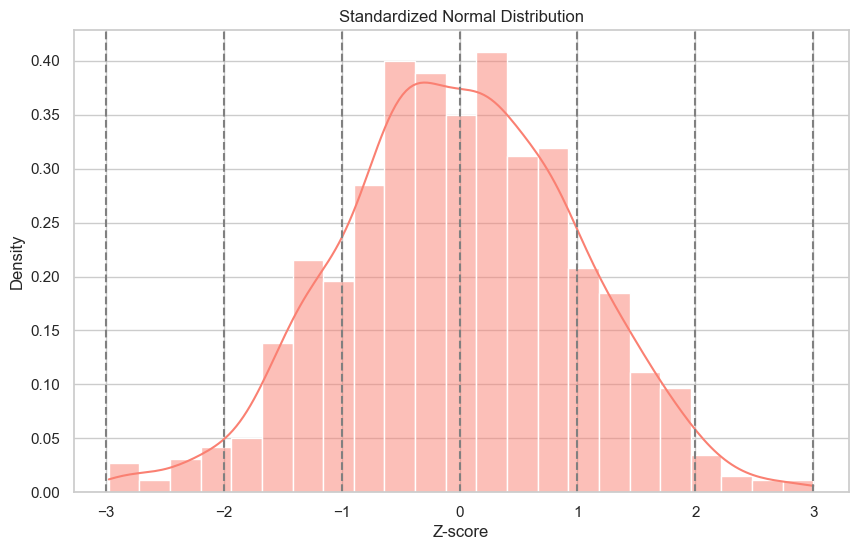

In [19]:
standardized_data = np.random.normal(0, 1, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(standardized_data, kde=True, color='salmon', stat='density')
plt.title('Standardized Normal Distribution')
plt.xlabel('Z-score')
plt.ylabel('Density')

for i in range(-3, 4):
    plt.axvline(x=i, color='gray', linestyle='--')

plt.show()


68.3 is contained within 1 to -1

95.5% is within 2 to -2

99.7% within 3 to -3

### Connection Betwen Z Sscore and P Value

High Z means being far from the average, thus having a lower p_value. 

### 1 Tale vs Two Tales Z Test

The tails are determined by the effect the researcher is investigating. If the researcher is investigating the chance of reducing blood pressure, its a one directional test e.g. a one tailed test. If the researcher is investigating any change, either more or less blood pressure, its a two tailed test. The two tailed test is more informative, its more strict and requires a higher Z for the same p_value

Scores for one tailed test

Z = 1.64 --> p = 0.05

Z = 2.32 --> p = 0.01

Z = 3.09 --> p = 0.001

If we want confidence of p = 0.05 we need to make sure the value we find in our data is at least 1.64 stds away from the mean.

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


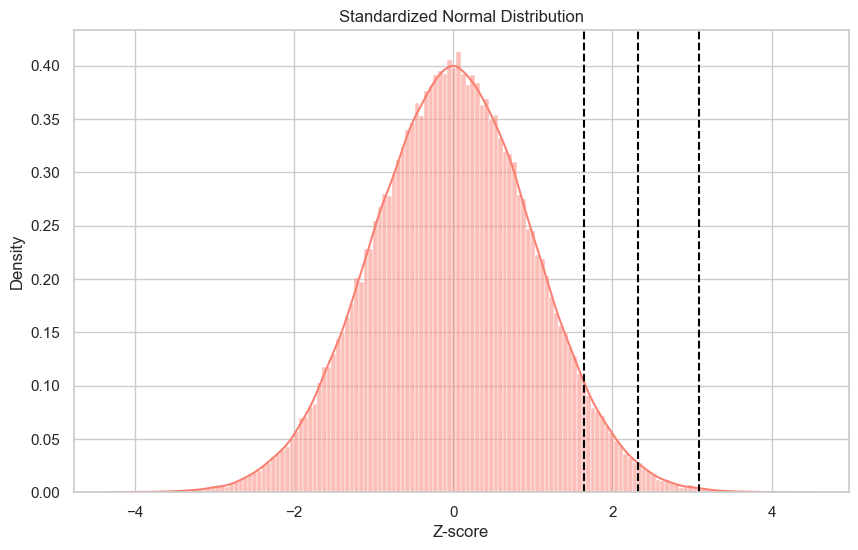

In [20]:
standardized_data = np.random.normal(0, 1, 100000)

plt.figure(figsize=(10, 6))
sns.histplot(standardized_data, kde=True, color='salmon', stat='density')
plt.title('Standardized Normal Distribution')
plt.xlabel('Z-score')
plt.ylabel('Density')

z_scores = [1.64, 2.32, 3.09]

for z in z_scores:
    plt.axvline(x=z, color='black', linestyle='--')

plt.show()

The stats are for a one tailed test. We use a one tailed test when we want to examine an hypothesis that has one direction. For example: did a manipulation add IQ? we don't test if it decreased IQ, only if it increased

#### Two Tailed Test Scores

Z = +-1.96 --> p = 0.05

Z = +-2.25 --> p = 0.01

Z = +-3.29 --> p = 0.001

If I want to use a p = 0.05 confidence that the effect is real, I need to get a result which is at least +- 1.96 stds from the mean.

### Exercise

$$
Z = \frac{x_i - \mu}{\sigma}
$$

1. Calculate the mean and standard deviation of the GDP per capita.
2. Calculate the z-score for each country.
3. Identify countries with above-average GDP per capita (z-score > 0).
4. Identify countries with below-average GDP per capita (z-score < 0).
5. Identify outliers (z-scores < -2 or z-scores > 2).

In [21]:
gdp_per_capita = [45000, 52000, 47000, 49000, 53000, 55000, 58000, 60000, 62000,
                  65000, 67000, 54000, 50000, 56000, 61000, 64000, 66000, 70000, 57000, 59000]


len(gdp_per_capita)

20

In [22]:
# Create list of 20 country names
countries = ['USA', 'Canada', 'UK', 'Germany', 'France', 'Italy', 'Spain', 'Portugal', 'Greece',
             'Norway', 'Sweden', 'Finland', 'Denmark', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
             'Australia', 'New Zealand', 'Ireland']

len(countries)

20

In [23]:
df = pd.DataFrame(data=gdp_per_capita, index=countries, columns=['GDP per Capita'])
df

,GDP per Capita
USA,45000
Canada,52000
UK,47000
Germany,49000
France,53000
Italy,55000
Spain,58000
Portugal,60000
Greece,62000
Norway,65000


In [24]:
# Create a DataFrame
gdp_df = pd.DataFrame({'Country': countries, 'GDP per Capita': gdp_per_capita})

In [25]:
gdp_average = gdp_df['GDP per Capita'].mean()
gdp_std = gdp_df['GDP per Capita'].std()

gdp_df['Z-score'] = (gdp_df['GDP per Capita'] - gdp_average) / gdp_std

gdp_df

,Country,GDP per Capita,Z-score
0,USA,45000,-1.791496
1,Canada,52000,-0.788258
2,UK,47000,-1.504857
3,Germany,49000,-1.218218
4,France,53000,-0.644939
5,Italy,55000,-0.358299
6,Spain,58000,0.071660
7,Portugal,60000,0.358299
8,Greece,62000,0.644939
9,Norway,65000,1.074898


In [26]:
print('Countries with Z-score > 0')
gdp_df[gdp_df['Z-score'] > 0]['Country']

Countries with Z-score > 0


6           Spain
7        Portugal
8          Greece
9          Norway
10         Sweden
14        Belgium
15    Switzerland
16        Austria
17      Australia
19        Ireland
Name: Country, dtype: object

In [27]:
print('Countries with Z-score < 0')
gdp_df[gdp_df['Z-score'] < 0]['Country']

Countries with Z-score < 0


0             USA
1          Canada
2              UK
3         Germany
4          France
5           Italy
11        Finland
12        Denmark
13    Netherlands
18    New Zealand
Name: Country, dtype: object

In [28]:
print('Countries with Z-score > 2 or Z-score < -2')
gdp_df[(gdp_df['Z-score'] > 2) | (gdp_df['Z-score'] < -2)]['Country']

Countries with Z-score > 2 or Z-score < -2


Series([], Name: Country, dtype: object)

In [29]:
gdp_df[(gdp_df['Z-score'] > 2) & (gdp_df['Z-score'] < - 2)]['Country']

Series([], Name: Country, dtype: object)

## Two Types of Mistakes

If you remember correctly, statistics aren't happy people. They dont accept, they only either reject or dont reject. They dont try to find if something new is true, they try to keep their old truth and if they really have to, they reject it. 

There are two ways of being correct - correctly rejecting or correctly accepting

There are also two ways of being wrong - incorrectly rejecting and incorrectly accepting

If its correct, its called true. If we've made a mistake, its called false.

True negative = its true (I was right) and the answer is no, I do not reject H0. The hypothesis is not correct, its negative. I truthfully, gave a negative answer.

True positive means I truthfully gave a positive answer.

False negative means I falsely gave a negative answer and false positive means I falsely gave a positive answer.

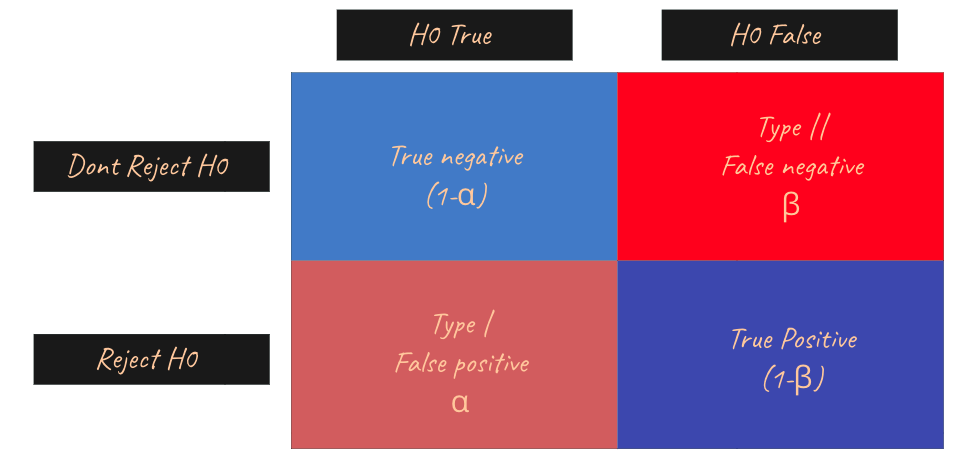

Some clarifications on the jargon:

alpha == significance level - probability of rejecting the H0 when its true (error 1)

Significance threshold - this black line we see. The more I increase it, the more sure I am of my result

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


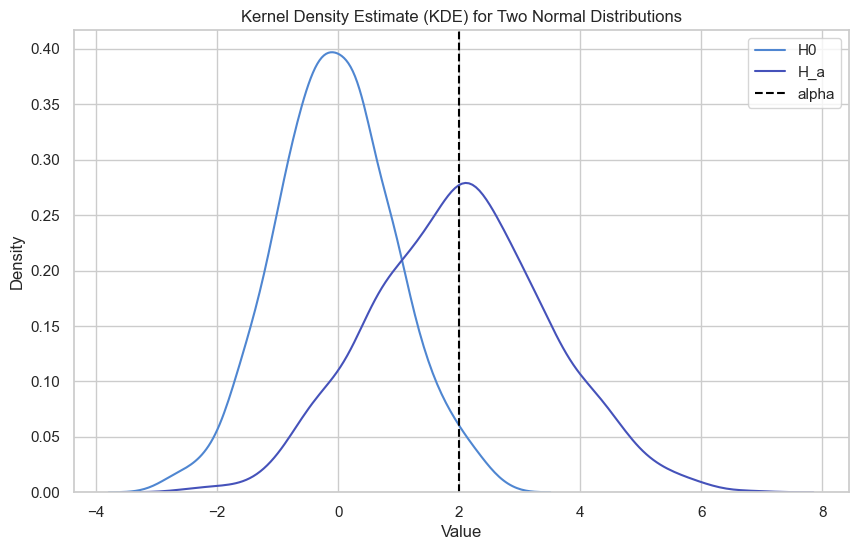

In [30]:
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=2, scale=1.5, size=1000)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data1, color='#4F86D1', label='H0')
sns.kdeplot(data2, color='#4552BA', label='H_a')
plt.axvline(x=2, color='black', linestyle='--', label='alpha')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) for Two Normal Distributions')
plt.legend()
plt.show()

### Error Type 1

Error type 1 is first and foremost - an error. It means I falsely did something. In error type 1, I falsely rejected H_0. I said the new medication is working, but its not. For example I said there is an earthquake, but there isnt. I said there is a nuclear strike coming, but there isnt.

Type 1 error are calculated using alpha. The smaller the alpha, the less likely I am to make a type 1 error.

### Error type 2

Error type 2 means I falsely accepted H_0. The medication IS working, and I said it isnt.

What does it mean we were wrong? Did we calculate wrongly? Used the wrong formula? No. We did everything correctly, the data showed H_a is true, but it isnt. The data is lying. Its a statistical survey, and it wasn't right this time.

For example there WAS an earthquake, and I missed it. There WAS a nuclear strike, and I missed it.

Type 2 errors are calculated using Beta. 

#### Calculating Beta

Beta is also known as effect size. It measures the size of the difference between two groups. Its a standardized measurement, meaning you can compare betas from different experiments and datasets.

One common way of calculating Beta is Cohen's d which is the difference between the means of two groups divided by the pooled standard deviation

$$ d = \frac{\bar{x}_1 - \bar{x}_2}{s_{\text{pooled}}} $$ 

$$ s_{\text{pooled}} = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $$

Where:
- x_1 and x_2 are the means of the two groups.
- s_1 and s_2 are the standard deviations of the two groups.
- n_1 and n_2 are the sample sizes of the two groups.


Calculate with pure Python

In [31]:
group1 = np.array([1, 2, 3, 4, 5])
group2 = np.array([2, 3, 4, 5, 6])

mean1 = np.mean(group1)
mean2 = np.mean(group2)

std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

pooled_std = np.sqrt(((len(group1) - 1) * std1**2 + (len(group2) - 1) * std2**2) / (len(group1) + len(group2) - 2))

effect_size = (mean1 - mean2) / pooled_std

print("Cohen's d (effect size):", effect_size)

Cohen's d (effect size): -0.6324555320336759


Same calculation, bigger differences in data

In [32]:
group1 = np.array([1, 2, 3, 4, 5])
group1 = group1 * 100
group2 = np.array([2, 3, 4, 5, 6])

mean1 = np.mean(group1)
mean2 = np.mean(group2)

std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

pooled_std = np.sqrt(((len(group1) - 1) * std1**2 + (len(group2) - 1) * std2**2) / (len(group1) + len(group2) - 2))

effect_size = (mean1 - mean2) / pooled_std

print("Cohen's d (effect size):", effect_size)

Cohen's d (effect size): 2.6473721200627973


In [33]:
effect_size = 2

alpha = 0.05  # Significance level
nobs1 = 4  # Number of observations in sample 1
ratio = 4 / 5  # Ratio of sample sizes

power_analysis = TTestIndPower()

power = power_analysis.power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=ratio)

print("Power of the test:", power)


Power of the test: 0.5817328426609495


Beta = 1 - test power

In [34]:
1 - 0.581

0.41900000000000004

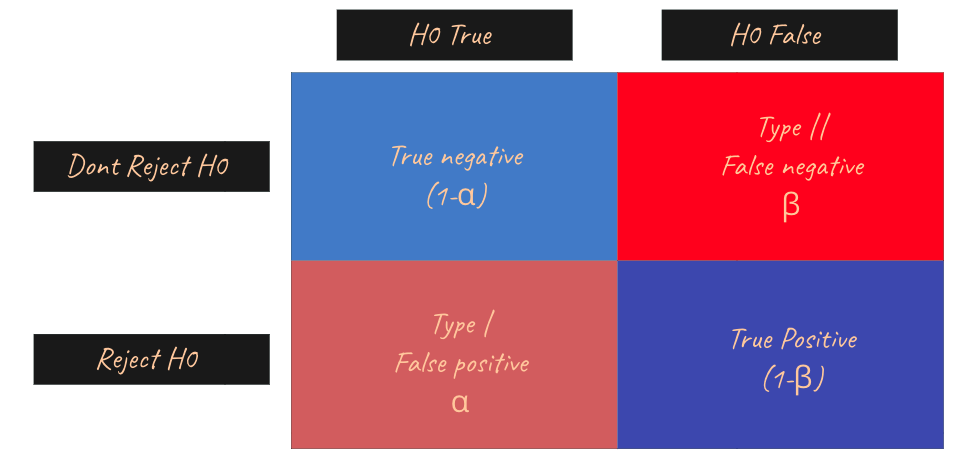

The left column is dependent on α. The right is dependent on β

α is the significance level. If I want to decrease type 1 mistakes, I need to increase the significance threshold, e.g. decrease alpha, for example from 0.05 to 0.01

Decreasing type 1 errors also reduces true positive. If I increase the significance threshold, which means I increase the significance <b> level </b> e.g. alpha, I keep my self less of a chance to detect TP which is truthfully saying H_a is true

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


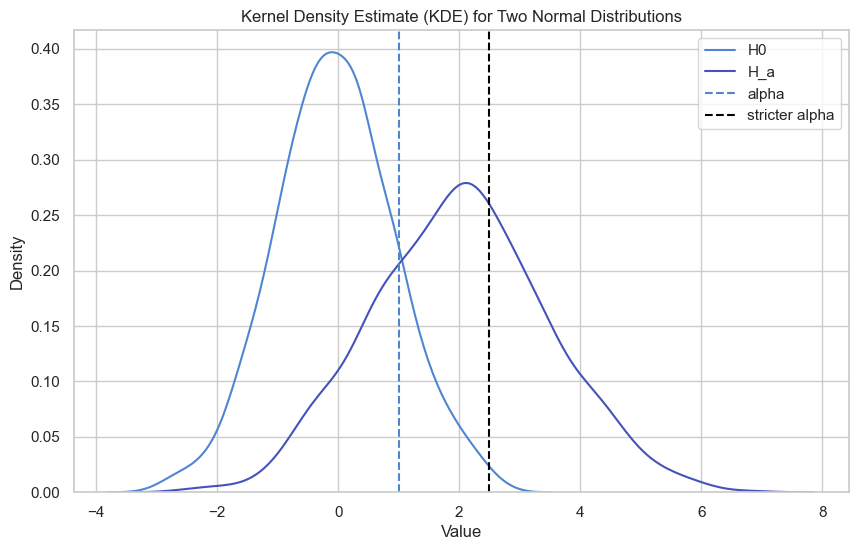

In [35]:
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=2, scale=1.5, size=1000)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data1, color='#4F86D1', label='H0')
sns.kdeplot(data2, color='#4552BA', label='H_a')
plt.axvline(x=1, color=(79/255, 134/255, 208/255), linestyle='--', label='alpha')
plt.axvline(x=2.5, color='black', linestyle='--', label='stricter alpha')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) for Two Normal Distributions')
plt.legend()
plt.show()


In what situation would I decrease my alpha? (increase my significance threshold)?. Where I dont want to make a Type 1 error, where mistakenly saying there is no affect is a problem. For example? ...

Declaring a life saving medication as helpful although its not.

Where would I want to avoid type 2 errors? e.g. missing a critical thing? in an important medical test. If someone has cancer, I want the test to find it. If there is a nuclear attack, I want to know.

### Exercise

Calculate how many type 1 errors you have. Write a loop that runs x times (you decide on x). On each iteration a new dataset is generated and a new calculation is formed. Decide on alpha and calculate the average type 1 errors.

## Minimizing Errors

We want to decrease the overlap between distirbutions. We cant really move H_0, we can try to move H_a so we either find a bigger effect 

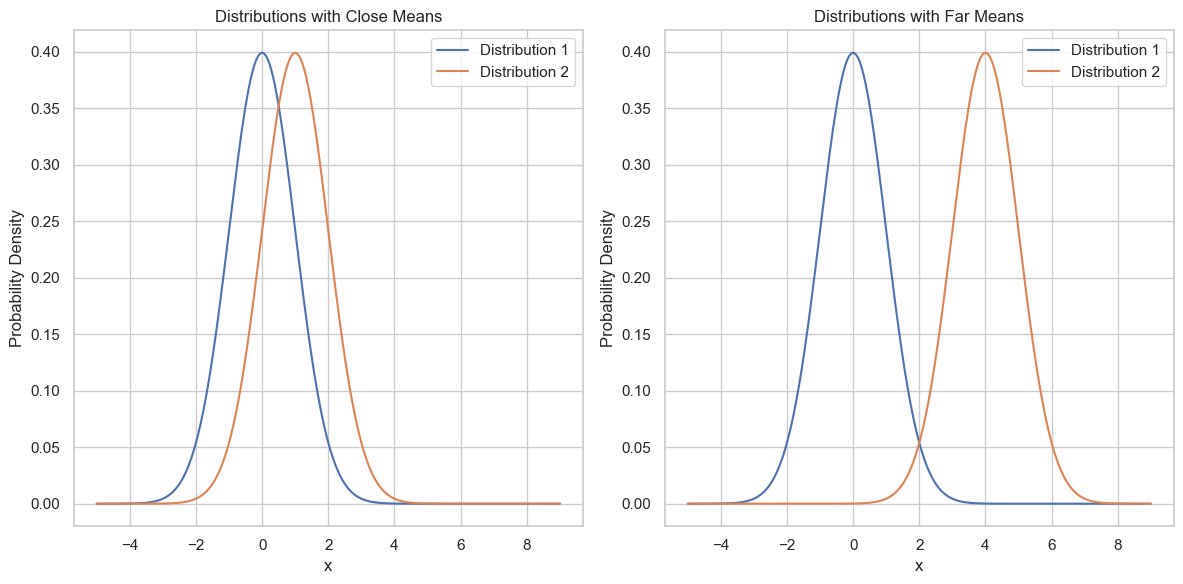

In [36]:
np.random.seed(0)

x = np.linspace(-5, 9, 1000)

mean_close_1 = 0
std_dev_close_1 = 1
dist_close_1 = norm.pdf(x, mean_close_1, std_dev_close_1)

mean_close_2 = 1
std_dev_close_2 = 1
dist_close_2 = norm.pdf(x, mean_close_2, std_dev_close_2)

mean_far_1 = 0
std_dev_far_1 = 1
dist_far_1 = norm.pdf(x, mean_far_1, std_dev_far_1)

mean_far_2 = 4
std_dev_far_2 = 1
dist_far_2 = norm.pdf(x, mean_far_2, std_dev_far_2)

plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)
plt.plot(x, dist_close_1, label='Distribution 1')
plt.plot(x, dist_close_2, label='Distribution 2')
plt.title('Distributions with Close Means')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dist_far_1, label='Distribution 1')
plt.plot(x, dist_far_2, label='Distribution 2')
plt.title('Distributions with Far Means')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


or we make the distributions less wide, e.g. more steep. We use data which is less variable, less disperse and so the effect is clearer.

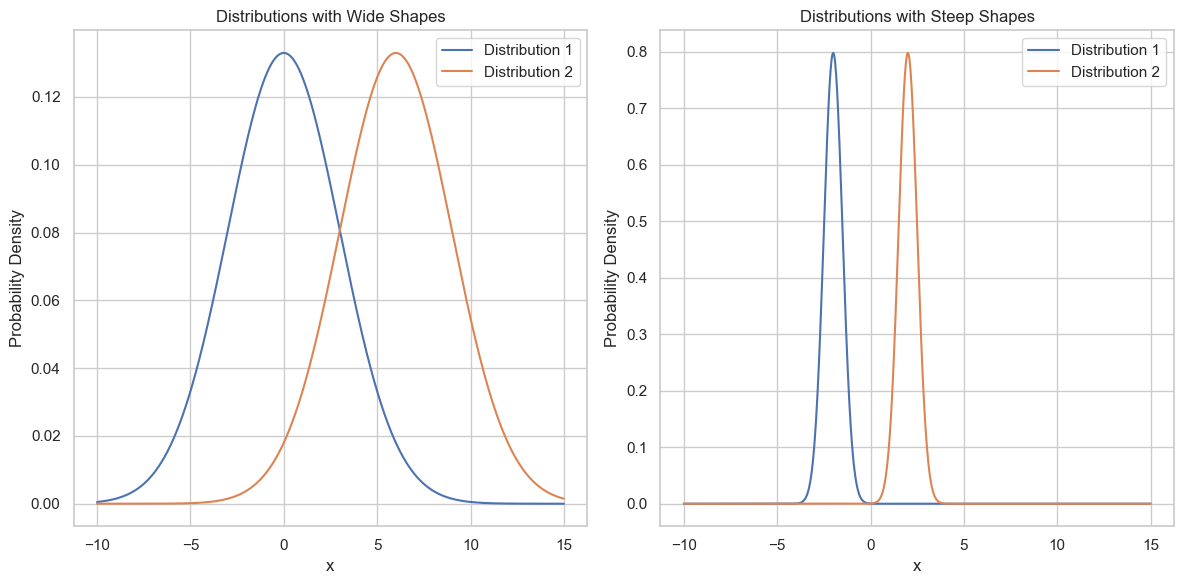

In [37]:
np.random.seed(0)

x = np.linspace(-10, 15, 1000) 

mean_wide_1 = 0
std_dev_wide_1 = 3
dist_wide_1 = norm.pdf(x, mean_wide_1, std_dev_wide_1)

mean_wide_2 = 6
std_dev_wide_2 = 3
dist_wide_2 = norm.pdf(x, mean_wide_2, std_dev_wide_2)

mean_steep_1 = -2
std_dev_steep_1 = 0.5
dist_steep_1 = norm.pdf(x, mean_steep_1, std_dev_steep_1)

mean_steep_2 = 2
std_dev_steep_2 = 0.5
dist_steep_2 = norm.pdf(x, mean_steep_2, std_dev_steep_2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, dist_wide_1, label='Distribution 1')
plt.plot(x, dist_wide_2, label='Distribution 2')
plt.title('Distributions with Wide Shapes')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dist_steep_1, label='Distribution 1')
plt.plot(x, dist_steep_2, label='Distribution 2')
plt.title('Distributions with Steep Shapes')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


# T-Test

T test is a test designed to test the difference between two groups. There are 3 main kinds of t tests:

1. One sample - tests a single group mean vs some theoretical expectation
2. Independent two sample - tests whether the mean of two independent groups is different
3. Paired sample - tests whether the means of some related group (for example the same group in different hours of the day) is different.

## Degress of Freedom

How many numbers do you need to calculate this mean?

mean = 2
a = 1
d = 2
c = ?

How many degress of freedom 

$$
10 = \frac{a + b + c + d}{4}
$$

If I say:

a = 1

b = 2

c = 3

Can you calculate d?

Degrees of freedom are the number of independent pieces of information in our data

## T-Test Formula

### One-Sample t-test

$$ t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} $$

### Independent Two-Sample t-test

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_{\text{pooled}} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$


### Paired Sample t-test

$$ t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}} $$

$$ \bar{d} $$ is the mean of the differences between paired observations.

In [38]:
len(x)

1000

The significance threshold is under 0.88. We look for that number in the t table and we get a result of say ... 0.34. This isnt good enough for us, we need something much smaller, say 0.05. 

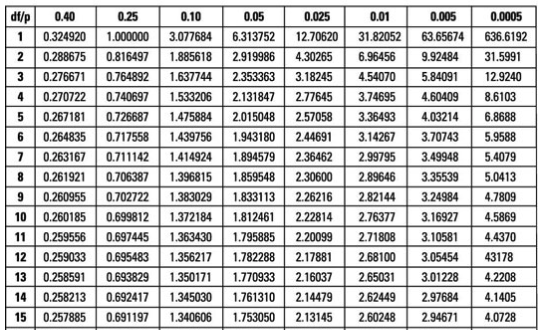

We don't currently get it. How can we increase the number so we get better results if they exist? looking at the formula, we see there are a couple of ways

 $$
t_k = \frac{\bar{X} - \mu *ֿ \sqrt{n}}{{S}}
$$


There are 3 ways of doing so:

1. We can hope the means difference will be higher.
2. We can increase the sample size
3. We can decrease the variation by getting more stable data.

There are quite a lot of variations for T tests. One is - one sample t test. In this t test we check if the sample mean we have in one group is different from some known mean in the population. For example the group I look at vs the mean in IQ terms.

In two sample t test we look for a difference in populations. I sampled two groups and I want to see their difference.

## One sample T-Test

In [39]:
np.random.seed(0) 
sample_data = np.random.normal(loc=10, scale=2, size=10)  # sample mean=10, std=2, size=30

sample_mean = np.mean(sample_data)

population_mean = 8

t_statistic, p_value = ttest_1samp(sample_data, population_mean)

print("Sample Mean:", sample_mean)
print("t-statistic:", t_statistic)
print("p-value:", p_value)
round(p_value, 3)

Sample Mean: 11.47604634145767
t-statistic: 5.391564054377209
p-value: 0.00043781262057068397


0.0

## Two samples T-Test

In [40]:
np.random.seed(0)
sample_data_1 = np.random.normal(loc=10, scale=2, size=50)  
sample_data_2 = np.random.normal(loc=11, scale=2, size=50) 

t_statistic, p_value = ttest_ind(sample_data_1, sample_data_2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -1.6677351961320244
p-value: 0.09856078338184587


### Exercise 

Take a dataset and perform one kind of t test of your choice.

Perform at least two tests, hopefully find one that is significant and one that isnt. 

* What alpha should you use? your call.
* This isnt mandatory, dont keep looking until you find one and one. Try to find data, that you has a higher chance of being significant and one that has a a lower chance.

Hint: some penguins sepcies have different flipper length/body mass.

# Confidence Intervals

The probability that that an unknown population parameter falls within a range of values in repeated samples

In other words its how confident can you be that the true pipulation mean lies within your interval

What it actually means is how likely future expertiments are to find the same result you found

For example, we want to know how high people are in the world. We cant measure everyone so we measure 1000 people. The average height is 167 cm. If we take another sample, the mean will be somewhat different. The confidence interval is an interval of values, a range, that has some percentage of gurantee that the real value in the world (lets say 170) is within that range.

Confidence intervals have confidence level associated to them. For example 95%. This means that if I take 100 samples, 95 of them will contain the population mean.

Confidence intervals are dependent on samples size (positive correlation) and vairance (negaive correlation)

$$
\text{Confidence Interval} = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
$$


Important note - this formula is the confidence interval for a population mean, e.g. normal distribution. If we want the confidence interval between two groups we will use a slightly different formula:

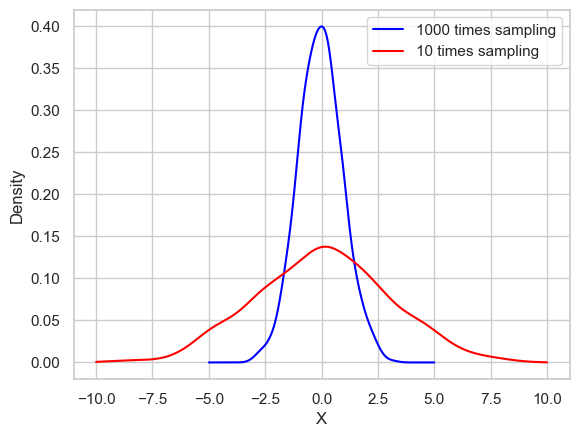

In [41]:

data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=0, scale=3, size=1000)

kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)

fig, ax = plt.subplots()

x1 = np.linspace(-5, 5, 1000)
ax.plot(x1, kde1(x1), color='blue', label='1000 times sampling')

x2 = np.linspace(-10, 10, 1000)
ax.plot(x2, kde2(x2), color='red', label='10 times sampling')

ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.legend()

plt.show()


$$
CI = P(L < \mu < U) 
$$

In [42]:
data = [88, 75, 82, 90, 70, 78, 85, 92, 79, 74]

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 to use the sample standard deviation

n = len(data)

confidence = 0.95

t_score = stats.t.ppf((1 + confidence) / 2.0, df=n-1)

margin_of_error = t_score * (sample_std / np.sqrt(n))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Sample Size: {n}")
print(f"{int(confidence * 100)}% Confidence Interval: {confidence_interval}")


NameError: name 'stats' is not defined

# Correlation

The correlation is a number between -1 and 1 that shows the linear relationship between two variables. Zero means no correlation.

In [ ]:
np.random.seed(42)
n = 100

water_amount = np.random.uniform(1, 10, n)
plant_height_pos = water_amount * 5 + np.random.normal(0, 5, n)

pest_count = np.random.uniform(1, 10, n)
plant_height_neg = 50 - pest_count * 3 + np.random.normal(0, 5, n)

sunlight_hours = np.random.uniform(1, 10, n)
plant_height_none = np.random.uniform(20, 80, n)

gardening_data = pd.DataFrame({
    'water_amount': water_amount,
    'plant_height_pos': plant_height_pos,
    'pest_count': pest_count,
    'plant_height_neg': plant_height_neg,
    'sunlight_hours': sunlight_hours,
    'plant_height_none': plant_height_none
})

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='water_amount', y='plant_height_pos', data=gardening_data)
plt.title('Positive Correlation: Plant Height vs. Water Amount')
plt.xlabel('Water Amount (liters)')
plt.ylabel('Plant Height (cm)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='pest_count', y='plant_height_neg', data=gardening_data)
plt.title('Negative Correlation: Plant Height vs. Pest Count')
plt.xlabel('Pest Count')
plt.ylabel('Plant Height (cm)')

plt.subplot(1, 3, 3)
sns.scatterplot(x='sunlight_hours', y='plant_height_none', data=gardening_data)
plt.title('No Correlation: Plant Height vs. Sunlight Hours')
plt.xlabel('Sunlight Hours')
plt.ylabel('Plant Height (cm)')

plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(0)
x = np.random.uniform(-1, 1, 1000)  # Uniform distribution between -1 and 1
y = x**2  # Parabolic relationship

corr_coefficient, _ = pearsonr(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot of y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

print(f"Pearson correlation coefficient: {corr_coefficient:.4f}")

Clearly there is a correlation, its just not linear

Correlation does not! imply casuality. 

For example, there is a strong correlation between the number of fire fighers that arrive to a scence and the damage the fire does. The more fire fighters - the more damage. Does that mean fire fighters cause the damage? Obviously not. The numbers demonstrate a correlation, but no casuality.

To test casuality when we need expertimental manipulations.

In [ ]:
np.random.seed(0)
fires = np.random.randint(5, 50, 100)
damage = fires + np.random.normal(0, 10, 100)

corr_coefficient, _ = pearsonr(fires, damage)

plt.figure(figsize=(10, 6))
plt.scatter(fires, damage, alpha=0.5)
plt.title('Positive Linear Correlation between Firefighters and Fire Damage')
plt.xlabel('Number of Firefighters at the Scene')
plt.ylabel('Amount of Damage Caused by the Fire')
plt.grid(True)
plt.show()

print(f"Pearson correlation coefficient: {corr_coefficient:.4f}")

### Exercise

Do correlations tell us something about the data?

Write code that takes all the numeric columns in a dataframe and calculate its correlations. What can you learn from that?

In [ ]:
cars = sns.load_dataset('car_crashes')

In [ ]:
# build a list of numeric columns only

## Covariance

Covariance is a number that measures the linear relationship between two variables. If that sounds a aweful lot like correlation, is because it IS a aweful lot. Correlation is a scaled covariance, scaled between -1 and 1.

Why do we need to normalize the covariance? because if I change the metric, for example from meters to cm, the range suddenly increases significantlly. It looks AS IF the correlation changed, but it didnt, only the metric changed.

*** Note - these formulas are the Pearson correlation formulas which is the most common

$$
\text{cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
$$


Why do we substact 1 from n? because after reducing all the numbers from the mean of x and y, we know the last number. We lose one degree of freedom.

$$
r_{X,Y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{X})^2} \cdot \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (y_i - \bar{Y})^2}}
$$


What happens when we increase n?

$$
t_{n-2} =  \frac{r \sqrt{n-2}}{\sqrt{1 - r^2}}
$$


## Partial Correlation

Partial correlation is a statistical technique used to measure the relationship between two variables while controlling for the effect of one or more additional variables, known as control variables or covariates.

In essence, it helps to understand the relationship between two variables after removing the effect of the other variables. This is particularly useful when there are potential confounding variables that might influence the relationship between the variables of interest.

We've seen there is an allegede correlation between fire fighters and amount of damage from a fire. It seems as if the fire fighters are the ones creating the damage. In this case its very easy to understand its not true, and we do know whats going on, but in other cases it might be much more difficult. 

Why did correlaiton get it wrong? becasue although there MIGHT BE some linkage between number of fire fighters and damage, (e.g. it might theoreitcally be that fire fighters create damage), we know there is some correlation in between that might exaplin it better. For example we know that the highet of the flames of the fire is correlated both to the number of fire fighters AND the damage and it might be a contributing factor.

For example (making up numbers), we found that the correlaiton between fire fighters and damage is 0.7. 

We also found that the correlation between fire fighters and fire hight is 0.5
and that the correlation between fire damage and number of fire fighters is 0.6

When we remove the partial correlation, e.g. when we take into account the might be intefering explanation, the corelation between fire fighters and fire damage, goes to 0.00001

The formula for the partial correlation between x and y, when accounting for the shared correlation with z

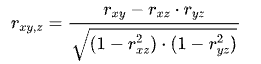

### Problems With Pearson Correlation

It only works well for linear, normal data. If there are outliers, non linear correlation or non normally distributed data, you might get the same correlation for completely different datasets.

In [ ]:
stats = []

def plot_anscombe():

    anscombe = sns.load_dataset("anscombe")
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))


    for i, (ax, (label, group)) in enumerate(zip(axs.flatten(), anscombe.groupby('dataset'))):
        x = group['x']
        y = group['y']

        ax.scatter(x, y)
        ax.set_title(f"Dataset {label}")

        model = LinearRegression()
        x_reshaped = x.values.reshape(-1, 1)
        model.fit(x_reshaped, y)
        y_pred = model.predict(x_reshaped)
        ax.plot(x, y_pred, color='red')

        stats.append({
            'dataset': label,
            'mean_x': np.mean(x),
            'mean_y': np.mean(y),
            'var_x': np.var(x, ddof=1),
            'var_y': np.var(y, ddof=1),
            'pearson_corr': np.corrcoef(x, y)[0, 1],
            'spearman_corr': spearmanr(x, y).correlation,
            'slope': model.coef_[0],
            'intercept': model.intercept_
        })

    plt.tight_layout()
    plt.show()

In [ ]:
for stat in stats:
    print(f"Dataset number: {stat['dataset']}")
    print(f"Pearson correlation between x and y: {stat['pearson_corr']}")
    print(f"Spearman correlation between x and y: {stat['spearman_corr']}")

In [ ]:
plot_anscombe()

What do we see here? Pearson is not good when it comes to non linear data or to data that contains outliers.

### Enters Spearman Correlation

Spearman correlation is a correlation calculation that is non parametric (e.g. do not assume a specific disitrubition, in contrast to Pearson which assumes normality) and is robust to outliers.

Spearman is actually pearson behind the scences, it just ignores the value itself and transform them into specific ranks (e.g. 1,2 will get the same transformation as 1,1000000)

If Spearman is so great, why bother with Pearson?

Sperman has a few disadvantages:

1. It assumes a monotonic relationship.
2. It's more computationally intensive.

# ANOVA

Anova - Analysis of variance

The purpose of the ANOVA test is to determine the effect of discrete (categorical) variables on a continuous variable.

We need to create a factors and levels table. Factors is the categories and levels are the possible values. For example, we divide people by age so age is factor, levels are the groups we divide them into. Young/old.

Computing the results. We can get:
1. Main effect - one factor influences
2. Interactions - the effect of one factor depeends on the levels of another factor

Example of the main effect - young people heal faster. Doesnt depend on anything else. 

Interactions - each medication works better on a different age group. The effect of the medication DEPENDS on the other variable - age

ANOVA assumptions:

1. Independence - the data is samples independently from each other. For example dont take samples from people living in the same house, or of the same family.

2. Normality - data is taken from a normal disitrubiton

3. Homogeneity of variance - the variance in different cells (combination of facotr + level) is pretty much the same.

What kind of test would you use for this problem?
1. If there are two groups, use T test
2. If there are multiple discrete groups and a continous DV, use ANOVA
3. if both the DV and the IDV are continuous, use correlaiton

Take the titanic dataset which you already know, and based on your previous analysis, generate more insightful, better proved insights.

1. Create at least one hypotheses. What is your null hypotheses?
2. Test it. Is it significant? Under what p value?
3. Try to come up with interesting relationships and insights using correlations